In [8]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
# k = boltzmann's constnat = 1.3806503 * 10 ** (-23) J/K


In [2]:
# calculates light generated current
def pv_current(i_nominal, temp_nominal, temp_actual, irradiation_nominal, irradiation_actual):
    k1 = 1 # some constant
    delta_temp = temp_nominal - temp_actual
    temp = k1 * delta_temp
    i_current = (i_nominal + temp) * irradiation_actual / irradiation_nominal
    return i_current


In [22]:
# calculates the diode saturation current
def saturation_current(i_sc_nom, v_oc_nom, v_t_nom, a, temp_nom, temp_act, bandgap_energy):
    # equation 5
    # v_t_nom is thermal voltage of Ns cells connected in series
    q = 1.602 * math.pow(10, -19) # charge on electron
    k = 1.3806503 * math.pow(10, -23) # boltzmann constant
    i0_n = i_sc_nom / (math.exp(v_oc_nom / (a * v_t_nom)) - 1)
    temp_energy_charge = (q * bandgap_energy / (a * k)) * ((1/temp_nom) - (1/temp_act))
    I0 = i0_n * (math.pow(temp_nom / temp_act, 3) * math.exp(temp_energy_charge))
    return I0

In [28]:
# calculates total current leaving pv
def current(i_pv, i_0, V, temp, a):
    # ideal equation
    k = 1.3806503 * math.pow(10, -23) # boltzmann constant
    q = 1.602 * math.pow(10, -19) # charge on electron
    return i_pv - i_0 * (math.exp(q * V / (1000*a*k*temp)) - 1) # take out 1000 later!! Just for math range err


In [26]:
# plots different voltage current pairs on an IV curve
def iv_curve(v_oc_n):
    v = np.arange(0, v_oc_n, 0.1)
    i = []
    for num in v:
        i.append(current(num, 1, 1, 1, 1))
    figure = plt.figure(1)
    plt.plot(v, i)
    plt.show()

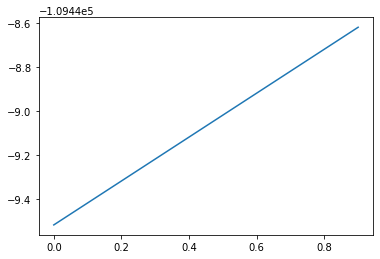

In [29]:
pv_current(1, 1, 1, 1, 1)
saturation_current(2, 2, 2, 2, 2, 2, 2)
current(1, 1, 1, 1, 1)
iv_curve(1)

## To Do next:
clean up (add descriptive comments including definitions for variables, etc)

find real values to test code with

change current() to not be only ideal

calculate power

create PV curve